In [1]:
import sys
sys.path.insert(0, "../")

import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.datasets import load_iris
from mcfa import (mcfa, mpl_utils, utils)

%matplotlib inline

In [2]:
seed = 42 # for reproducibility

N = 10000
D = 10
J = 3
K = 5

X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)

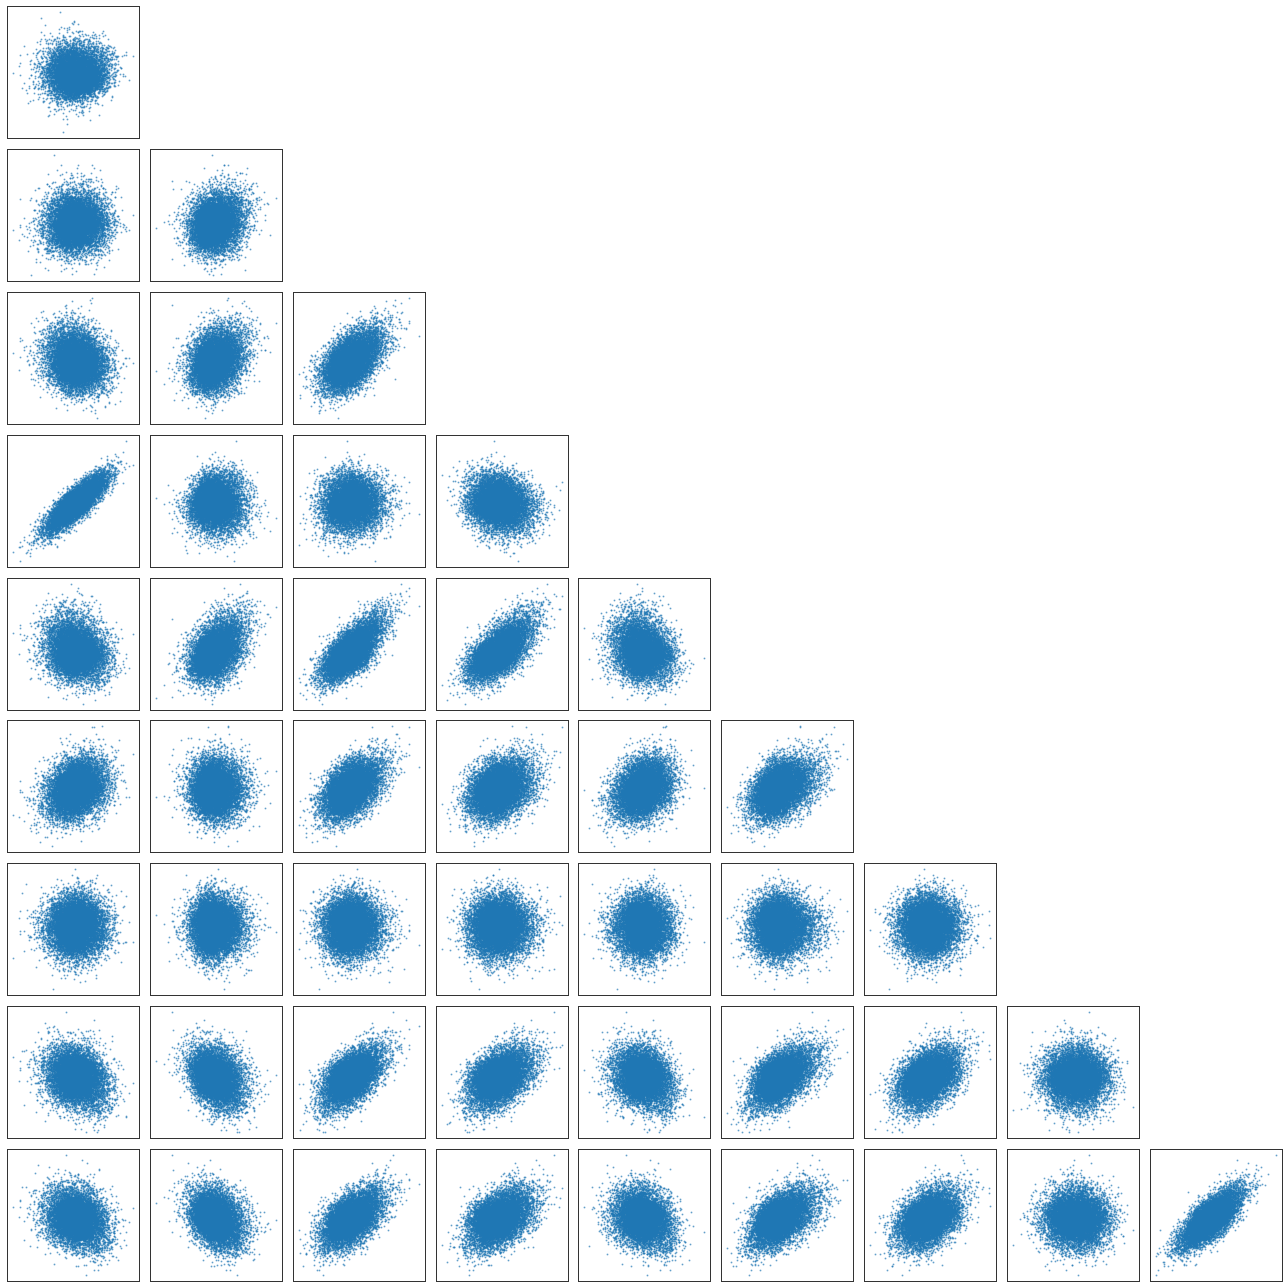

In [3]:
fig = mpl_utils.corner_scatter(X)

In [4]:
model = mcfa.MCFA(n_components=5, n_latent_factors=3)

In [5]:
#%timeit model.fit(X, slow=True)

In [6]:
from time import time
t_init = time()
model.fit(X)
print("elapsed: {}".format(time() - t_init))

elapsed: 3.4717681407928467


In [7]:
#%timeit model._expectation(X, *model.theta_)

In [8]:
#%timeit model.expectation(X, *model.theta_)

In [9]:
seed = 42 # for reproducibility

D = 10
J = 3
K = 5

model = mcfa.MCFA(n_components=K, n_latent_factors=J,
                  n_init=1, n_random_init=0)

lower, upper = 2, 6
Ns_per_decade = 10

Ns = np.logspace(lower, upper, Ns_per_decade * (upper - lower) + 1).astype(int)

costs = np.zeros((Ns.size, 4), dtype=float)

for i, N in enumerate(Ns):
    ta = time()
    X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)
    t_simulate = time() - ta
    
    t_a = time()
    initial = model._initial_parameters(X)
    t_init = time() - t_a
    
    ta = time()
    model.fit(X, init_params=initial)
    t_fit = time() - ta
    
    print("{}: {:.1e} s to generate; {:.1e} to initialise; {:.1e} s to fit; {:.1e} s per e-m step; ll = {:.0f}".format(
         N, t_simulate, t_init, t_fit, t_fit/model.n_iter_, model.log_likelihood_))
    
    costs[i] = [t_simulate, t_init, t_fit, t_fit/model.n_iter_]

100: 4.5e-03 s to generate; 2.9e-02 to initialise; 2.3e-01 s to fit; 3.0e-03 s per e-m step; ll = -1299
125: 2.9e-03 s to generate; 2.5e-02 to initialise; 2.4e-01 s to fit; 3.3e-03 s per e-m step; ll = -1731
158: 3.2e-03 s to generate; 3.2e-02 to initialise; 1.7e-01 s to fit; 3.2e-03 s per e-m step; ll = -2050
199: 4.1e-03 s to generate; 3.7e-02 to initialise; 1.6e-01 s to fit; 3.2e-03 s per e-m step; ll = -2584
251: 5.5e-03 s to generate; 4.6e-02 to initialise; 2.3e-01 s to fit; 3.6e-03 s per e-m step; ll = -3315
316: 5.1e-03 s to generate; 3.6e-02 to initialise; 9.0e-02 s to fit; 3.2e-03 s per e-m step; ll = -4308
398: 9.4e-03 s to generate; 6.6e-02 to initialise; 2.8e-01 s to fit; 3.4e-03 s per e-m step; ll = -5254
501: 6.8e-03 s to generate; 5.6e-02 to initialise; 2.1e-01 s to fit; 4.2e-03 s per e-m step; ll = -7207
630: 8.2e-03 s to generate; 6.8e-02 to initialise; 2.1e-01 s to fit; 4.4e-03 s per e-m step; ll = -8636
794: 1.1e-02 s to generate; 1.0e-01 to initialise; 1.8e-01 s to 

[]

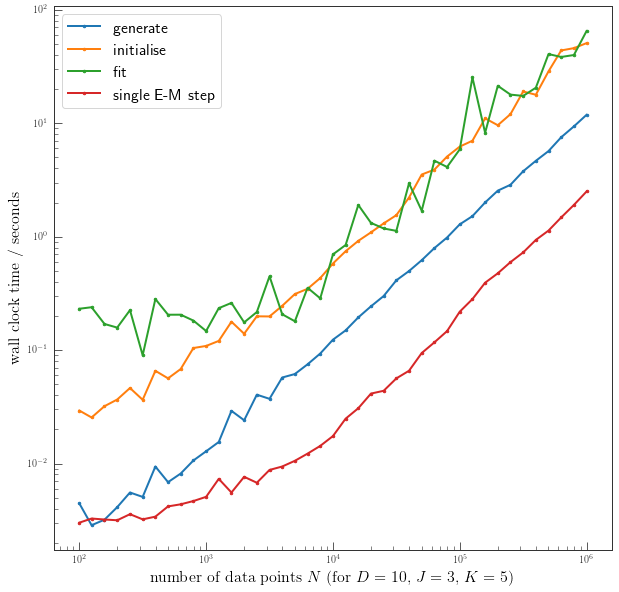

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
for i, label in enumerate(("generate", "initialise", "fit", "single E-M step")):
    try:
        ax.plot(Ns, costs.T[i], label=label, lw=2)
    except IndexError:
        continue
        

ax.set_xlabel(r"\textrm{number of data points $N$ (for $D=10$, $J=3$, $K=5$)}", fontsize=16)
ax.set_ylabel(r"\textrm{wall clock time / seconds}", fontsize=16)
ax.legend(loc="upper left", fontsize=16)
ax.loglog()

In [11]:
# 10,000 data points with 10 dimensions cost about two minutes on Friday July 27th